In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text


# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="1" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def gen_data(mean = 0, var = 1, SIZE = 20000):
    a = np.random.normal(mean, var, SIZE)
    b = a + np.random.normal(mean, var, SIZE)
    c =  a + b + np.random.normal(mean, var, SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c})

pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()
from pycausal import prior as p
import itertools
def get_pairs(lst):
    a = set()
    for i in itertools.permutations(lst,2):
        a.add(i)
    return a
full_conx = get_pairs(['a', 'b', 'c'])
forced_conx = set({('a','b'), ('a','c'), ('b','c')})
restricted_conx = full_conx.difference(forced_conx)   
prior = p.knowledge(requiredirect =  list(map(list, forced_conx)))

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

models = []
model_names = []

num_models = 100

randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/random' + str(i))
    print(models, model_names)    
else:
    model_layers = [512,256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/e' + str(i))

print(models, model_names)

inputs = ['a', 'b']
target = ['c']
df = gen_data()
X = df[inputs].values
y = df[target].values

val_df = gen_data(SIZE = 2000)
x_val = df[inputs].values
y_val = df[target].values

[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

In [3]:
import CausalAssurance as ca

ca.train_models(models, model_names, X, y, x_val, y_val, inputs)

temp/e0
temp/e1
temp/e2
temp/e3
temp/e4
temp/e5
temp/e6
temp/e7
temp/e8
temp/e9
temp/e10
temp/e11
temp/e12
temp/e13
temp/e14
temp/e15
temp/e16
temp/e17
temp/e18
temp/e19
temp/e20
temp/e21
temp/e22
temp/e23
temp/e24
temp/e25
temp/e26
temp/e27
temp/e28
temp/e29
temp/e30
temp/e31
temp/e32
temp/e33
temp/e34
temp/e35
temp/e36
temp/e37
temp/e38
temp/e39
temp/e40
temp/e41
temp/e42
temp/e43
temp/e44
temp/e45
temp/e46
temp/e47
temp/e48
temp/e49
temp/e50
temp/e51
temp/e52
temp/e53
temp/e54
temp/e55
temp/e56
temp/e57
temp/e58
temp/e59
temp/e60
temp/e61
temp/e62
temp/e63
temp/e64
temp/e65
temp/e66
temp/e67
temp/e68
temp/e69
temp/e70
temp/e71
temp/e72
temp/e73
temp/e74
temp/e75
temp/e76
temp/e77
temp/e78
temp/e79
temp/e80
temp/e81
temp/e82
temp/e83
temp/e84
temp/e85
temp/e86
temp/e87
temp/e88
temp/e89
temp/e90
temp/e91
temp/e92
temp/e93
temp/e94
temp/e95
temp/e96
temp/e97
temp/e98
temp/e99
Train on 20000 samples, validate on 20000 samples
Epoch 1/20
20000/20000 [==============================] - 3s

In [4]:
model = load_model(model_names[0])
nb_test = 2000
metrics_dicts = []
for m in models:
    metrics_dicts.append(defaultdict(list))
means = [0, 1, 2]
variances = [1, 2, 3]

nshap = 100
base_df = gen_data()
def norm(a):
    return a / np.sum(a)



from sklearn.metrics import mean_absolute_error
for m in means:
    for v in variances:
        print("<<<<<<<<", m,v)
        perturbed_df = gen_data(mean =m, var = v, SIZE = nb_test)
        y_test2 = perturbed_df[target]
        x_test2 = perturbed_df[inputs]
        for idx, model_name in enumerate(model_names):
            print(model_name)
            if type(models[idx]) is list:
                keras.backend.clear_session()
                model = load_model(model_name)
            else:
                model = models[idx]
            
            y_pred2 = model.predict(x_test2)
            metrics_dicts[idx][str(m) + '_' + str(v)].append(mean_squared_error(y_test2, y_pred2))



<<<<<<<< 0 1
temp/e0
temp/e1
temp/e2
temp/e3
temp/e4
temp/e5
temp/e6
temp/e7
temp/e8
temp/e9
temp/e10
temp/e11
temp/e12
temp/e13
temp/e14
temp/e15
temp/e16
temp/e17
temp/e18
temp/e19
temp/e20
temp/e21
temp/e22
temp/e23
temp/e24
temp/e25
temp/e26
temp/e27
temp/e28
temp/e29
temp/e30
temp/e31
temp/e32
temp/e33
temp/e34
temp/e35
temp/e36
temp/e37
temp/e38
temp/e39
temp/e40
temp/e41
temp/e42
temp/e43
temp/e44
temp/e45
temp/e46
temp/e47
temp/e48
temp/e49
temp/e50
temp/e51
temp/e52
temp/e53
temp/e54
temp/e55
temp/e56
temp/e57
temp/e58
temp/e59
temp/e60
temp/e61
temp/e62
temp/e63
temp/e64
temp/e65
temp/e66
temp/e67
temp/e68
temp/e69
temp/e70
temp/e71
temp/e72
temp/e73
temp/e74
temp/e75
temp/e76
temp/e77
temp/e78
temp/e79
temp/e80
temp/e81
temp/e82
temp/e83
temp/e84
temp/e85
temp/e86
temp/e87
temp/e88
temp/e89
temp/e90
temp/e91
temp/e92
temp/e93
temp/e94
temp/e95
temp/e96
temp/e97
temp/e98
temp/e99
<<<<<<<< 0 2
temp/e0
temp/e1
temp/e2
temp/e3
temp/e4
temp/e5
temp/e6
temp/e7
temp/e8
temp/e9
temp

In [5]:


#the number of times to sample
times = 3


violations = np.zeros(len(models))
violation_mean = np.zeros((len(models), times))
mean = np.zeros((len(models), times))


def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               penaltyDiscount = penalty
               )
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)





for t in range(times):
    print("Times = ", t)
    df_test = gen_data(SIZE = nb_test)
    x_test = df_test[inputs].values
    y_test = df_test[target].values
    bic_orig = get_bic(df_test,prior)

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]
        test_df = pd.DataFrame(x_test, columns = inputs)
        test_targets = pd.DataFrame(model.predict(x_test), columns = target)
        test_df = test_df.join(test_targets)
       
        mean[idx][t] = mean_squared_error(y_test, model.predict(x_test)) 
        bic_pred = get_bic(test_df,prior)
        print(tetrad.getEdges())


        violation_mean[idx][t] = bic_pred
        #print(bic_orig - bic_pred)

Times =  0
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a

['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a --> c', 'b --> c']
['a --> b', 'a

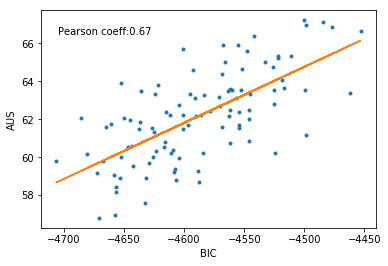

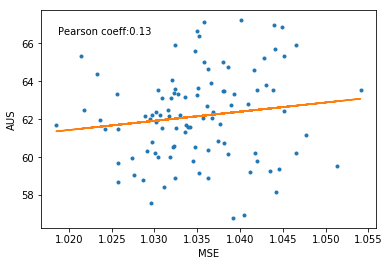

In [6]:
MSE = []
SHAP = []
SHAP_VAR = []
VIO = []
AUS = []
for i, m in enumerate(models):
    x = []
    y = []
    z = []
    
    
    rectangular_approx = 0
    for k, v in metrics_dicts[i].items():
        x.append(float(k.split('_')[0]))
        y.append(float(k.split('_')[-1]))
        z.append(np.mean(v))
        rectangular_approx += np.mean(v)
    MSE.append(np.mean(mean[i]))
    VIO.append(np.mean(violation_mean[i]))
    AUS.append(rectangular_approx)
    
fig, ax = plt.subplots()
b,m = polyfit(VIO,AUS, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(VIO,AUS)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(VIO,AUS, '.')
plt.plot(VIO, b + m * np.array(VIO), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("AUS")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(MSE,AUS, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(MSE,AUS)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(MSE,AUS, '.')
plt.plot(MSE, b + m * np.array(MSE), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("AUS")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()
